<a href="https://colab.research.google.com/github/ConanOReilly/Final_Year_Project/blob/main/Metadata/Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Baseline**
A baseline in machine learning serves as a simple reference point to evaluate the performance of more complex models.

Models used:

*   Logistic Regression.
*   Decision Tree.
*   Random Forest.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

#**Load and Analyse Dataset**

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Final Year Project/Data/PAD/Metadata/Metadata.csv")

In [ ]:
df.head(3).transpose()

,0,1,2
patient_id,PAT_1516,PAT_46,PAT_1545
lesion_id,1765,881,1867
smoke,NaN,False,NaN
drink,NaN,False,NaN
background_father,NaN,POMERANIA,NaN
background_mother,NaN,POMERANIA,NaN
age,8,55,77
pesticide,NaN,False,NaN
gender,NaN,FEMALE,NaN
skin_cancer_history,NaN,True,NaN


In [ ]:
# Inspect missing values
print(df.isnull().sum())

patient_id               0
lesion_id                0
smoke                  804
drink                  804
background_father      818
background_mother      822
age                      0
pesticide              804
gender                 804
skin_cancer_history    804
cancer_history         804
has_piped_water        804
has_sewage_system      804
fitspatrick            804
region                   0
diameter_1             804
diameter_2             804
diagnostic               0
itch                     0
grew                     0
hurt                     0
changed                  0
bleed                    0
elevation                0
img_id                   0
biopsed                  0
dtype: int64


In [ ]:
# Check class distribution
print(df["diagnostic"].value_counts())

diagnostic
BCC    845
ACK    730
NEV    244
SEK    235
SCC    192
MEL     52
Name: count, dtype: int64


#**Preprocessing for baseline models**

In [ ]:
# Dropping rows with missing values
df_clean = df.dropna()

# Defining features and target variable
X = df_clean.drop(columns=['diagnostic', 'patient_id', 'lesion_id', 'img_id'])  # Removing identifiers
y = df_clean['diagnostic']

# Categorizing columns into categorical and numerical features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

#**Logistic Regression**

**Model**

In [ ]:
# Logistic Regression model pipeline
logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Training the model
logistic_regression_model.fit(X_train, y_train)

# Making predictions
y_pred = logistic_regression_model.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.7254
Classification Report:
               precision    recall  f1-score   support

         ACK       0.69      0.69      0.69        55
         BCC       0.76      0.91      0.83       169
         MEL       0.78      0.70      0.74        10
         NEV       0.89      0.57      0.70        14
         SCC       0.40      0.15      0.22        39
         SEK       0.33      0.25      0.29         8

    accuracy                           0.73       295
   macro avg       0.64      0.55      0.58       295
weighted avg       0.70      0.73      0.70       295



**AUC-ROC CURVE**

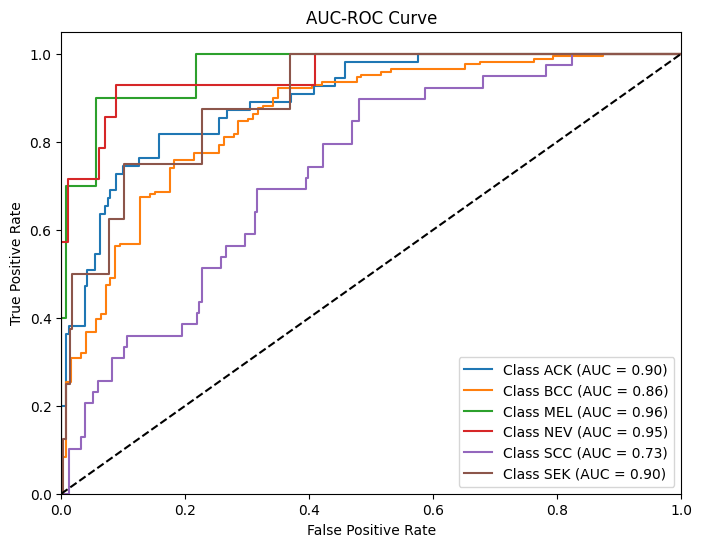

In [ ]:
# Binarizing the target variable for multi-class classification
y_val_binarized = label_binarize(y_val, classes=logistic_regression_model.classes_)
y_pred_proba = logistic_regression_model.predict_proba(X_val)

# Plotting the AUC-ROC curve
plt.figure(figsize=(8, 6))
for i in range(y_val_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {logistic_regression_model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()

#**Decision Tree**

**Model**

In [ ]:
# Decision Tree model pipeline
decision_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Training the model
decision_tree_model.fit(X_train, y_train)

# Making predictions
y_pred = decision_tree_model.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.7153
Classification Report:
               precision    recall  f1-score   support

         ACK       0.65      0.67      0.66        55
         BCC       0.84      0.81      0.83       169
         MEL       0.44      0.40      0.42        10
         NEV       0.64      0.50      0.56        14
         SCC       0.50      0.62      0.55        39
         SEK       0.29      0.25      0.27         8

    accuracy                           0.72       295
   macro avg       0.56      0.54      0.55       295
weighted avg       0.72      0.72      0.72       295



**AUC-ROC CURVE**

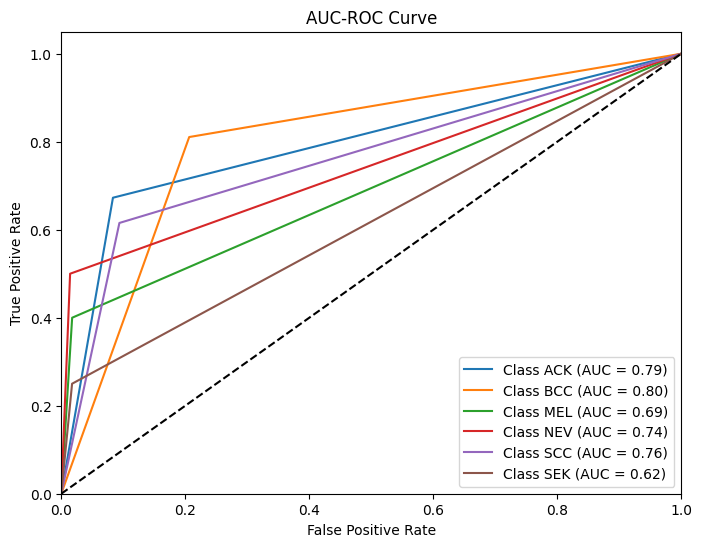

In [ ]:
# Binarizing the target variable for multi-class classification
y_val_binarized = label_binarize(y_val, classes=decision_tree_model.classes_)
y_pred_proba = decision_tree_model.predict_proba(X_val)

# Plotting the AUC-ROC curve
plt.figure(figsize=(8, 6))
for i in range(y_val_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {logistic_regression_model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()

#**Random Forest**

**Model**

In [ ]:
# Random Forest model pipeline
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Training the model
random_forest_model.fit(X_train, y_train)

# Making predictions
y_pred = random_forest_model.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

# Print model evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.7831
Classification Report:
               precision    recall  f1-score   support

         ACK       0.79      0.75      0.77        55
         BCC       0.78      0.94      0.85       169
         MEL       0.80      0.40      0.53        10
         NEV       0.73      0.57      0.64        14
         SCC       0.85      0.44      0.58        39
         SEK       1.00      0.25      0.40         8

    accuracy                           0.78       295
   macro avg       0.82      0.56      0.63       295
weighted avg       0.79      0.78      0.77       295



**AUC-ROC CURVE**

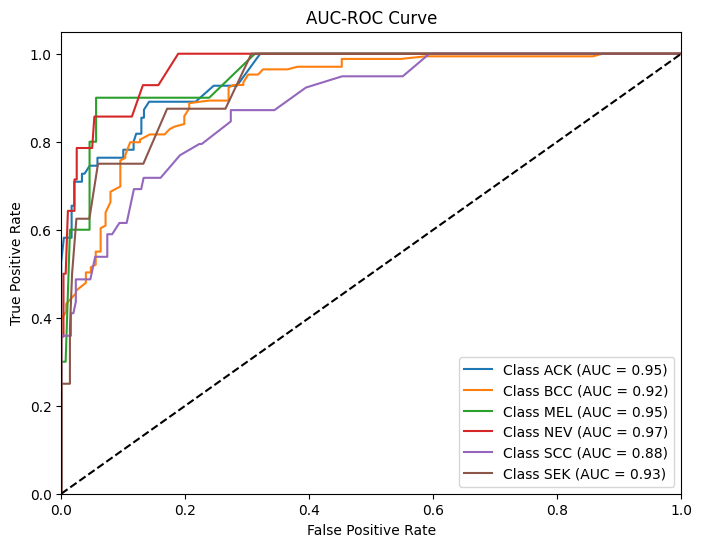

In [ ]:
# Binarizing the target variable for multi-class classification
y_val_binarized = label_binarize(y_val, classes=random_forest_model.classes_)
y_pred_proba = random_forest_model.predict_proba(X_val)

# Plotting the AUC-ROC curve
plt.figure(figsize=(8, 6))
for i in range(y_val_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {logistic_regression_model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()

#**Feature Importance**

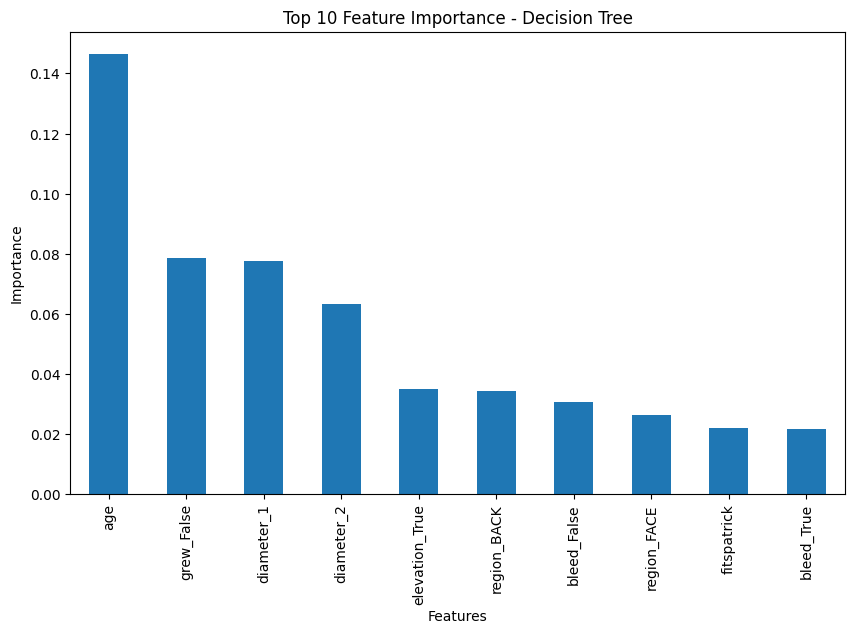

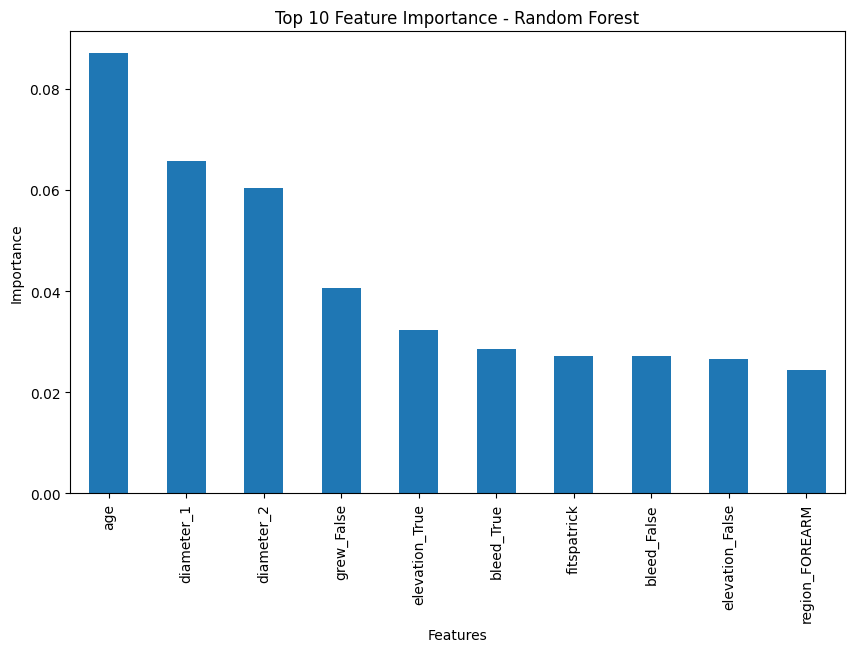

In [ ]:
# Feature importance function
def plot_feature_importance(model, model_name):
    if hasattr(model.named_steps['classifier'], 'feature_importances_'):
        importance = model.named_steps['classifier'].feature_importances_
        feature_names = numerical_cols + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols))
        feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        feature_importance[:10].plot(kind='bar')
        plt.title(f"Top 10 Feature Importance - {model_name}")
        plt.xlabel("Features")
        plt.ylabel("Importance")
        plt.show()
    else:
        print(f"Feature importance not available for {model_name}")

# Ploting feature importance for Decision Tree and Random Forest
plot_feature_importance(decision_tree_model, "Decision Tree")
plot_feature_importance(random_forest_model, "Random Forest")